Problem Statement: - 
The Departmental Store, has gathered the data of the products it sells on a Daily basis.
Using Association Rules concepts, provide the insights on the rules and the plots.


Business Problem:
The departmental store wants to optimize sales by identifying products frequently bought together using association rule mining.

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt  
import seaborn as sns 

import pandas as pd 
from mlxtend.frequent_patterns  import apriori,association_rules 
from mlxtend.preprocessing import TransactionEncoder 

In [5]:
df = pd.read_csv("C:/Assignments(DS)/groceries.csv",on_bad_lines='skip')

In [6]:
df.sample(3)

,citrus fruit,semi-finished bread,margarine,ready soups
4534,pastry,waffles,shopping bags,NaN
2595,canned beer,NaN,NaN,NaN
5266,processed cheese,brown bread,NaN,NaN


In [7]:
#step 1:covert the dataset into a format suitable for Aprioriabs
Ste=TransactionEncoder()
k=Ste.fit_transform(df)

df1=pd.DataFrame(k,columns=Ste.columns_)

#step 2:Apply the Apriori algo 
frequent=apriori(df1,min_support=0.005,use_colnames=True)
print(frequent)
# rule=association_rules(frequent,metric='lift',min_threshold=1)

Empty DataFrame
Columns: [support, itemsets]
Index: []


In [8]:
df.shape

(6105, 4)

In [9]:
for support in [0.05, 0.04, 0.03, 0.02, 0.01]:
    frequent = apriori(df1, min_support=support, use_colnames=True)
    print(f"min_support={support}, number of frequent itemsets: {len(frequent)}")

min_support=0.05, number of frequent itemsets: 0
min_support=0.04, number of frequent itemsets: 0
min_support=0.03, number of frequent itemsets: 0
min_support=0.02, number of frequent itemsets: 0
min_support=0.01, number of frequent itemsets: 0


In [10]:
df1.shape

(6105, 20)

Item Frequencies:
 r    4
     3
e    3
s    3
i    3
a    3
d    2
f    2
m    2
n    2
u    2
c    1
g    1
h    1
-    1
o    1
p    1
b    1
t    1
y    1
dtype: int64


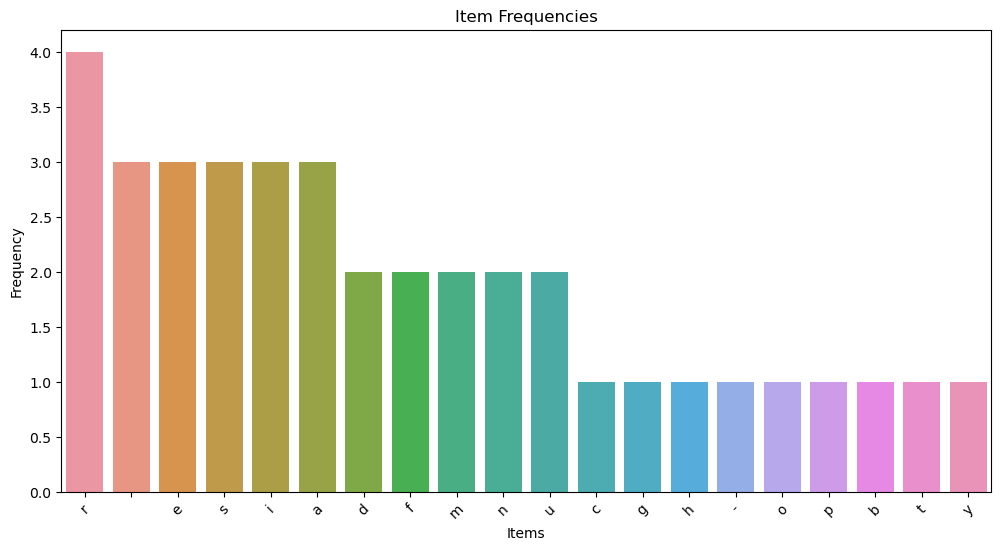

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

item_frequencies = df1.sum().sort_values(ascending=False)
print("Item Frequencies:\n", item_frequencies)
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequencies.index, y=item_frequencies.values)
plt.xticks(rotation=45)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.show()